Alice has n balloons arranged on a rope. You are given a 0-indexed string colors where colors[i] is the color of the ith balloon.

Alice wants the rope to be colorful. She does not want two consecutive balloons to be of the same color, so she asks Bob for help. Bob can remove some balloons from the rope to make it colorful. You are given a 0-indexed integer array neededTime where neededTime[i] is the time (in seconds) that Bob needs to remove the ith balloon from the rope.

Return the minimum time Bob needs to make the rope colorful.

 

Example 1:

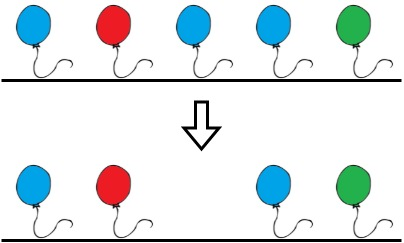

Input: colors = "abaac", neededTime = [1,2,3,4,5]
Output: 3
Explanation: In the above image, 'a' is blue, 'b' is red, and 'c' is green.
Bob can remove the blue balloon at index 2. This takes 3 seconds.
There are no longer two consecutive balloons of the same color. Total time = 3.

Example 2:

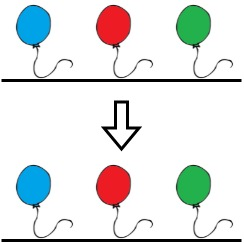

Input: colors = "abc", neededTime = [1,2,3]
Output: 0
Explanation: The rope is already colorful. Bob does not need to remove any balloons from the rope.

Example 3:

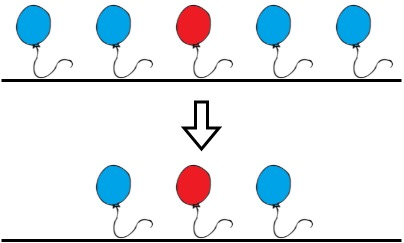

Input: colors = "aabaa", neededTime = [1,2,3,4,1]
Output: 2
Explanation: Bob will remove the ballons at indices 0 and 4. Each ballon takes 1 second to remove.
There are no longer two consecutive balloons of the same color. Total time = 1 + 1 = 2.

 

Constraints:

    n == colors.length == neededTime.length
    1 <= n <= 105
    1 <= neededTime[i] <= 104
    colors contains only lowercase English letters.



In [3]:
from typing import List

class Solution:
    def minCost(self, colors: str, neededTime: List[int]) -> int:
        colors = list(colors)
        i = 0
        total_time = 0
        while i < len(colors) - 1:
            if colors[i] == colors [i + 1]:
                if neededTime[i] < neededTime[i + 1]:
                    colors.pop(i)
                    time = neededTime.pop(i)
                else:
                    colors.pop(i + 1)
                    time = neededTime.pop(i + 1)
                total_time += time
            else:
                i += 1
                
        return total_time

In [4]:
s = Solution()
s.minCost("abaac", [1,2,3,4,5])

3

In [5]:
s.minCost("abc", [1, 2, 3])

0

In [6]:
s.minCost("aabaa", [1,2,3,4,1])

2

In [ ]:
class Solution:
    def minCost(self, colors: str, neededTime: List[int]) -> int:
        # Initalize two pointers i, j.
        total_time = 0
        i, j = 0, 0
        
        while i < len(neededTime) and j < len(neededTime):
            curr_total = 0
            curr_max = 0
            
            # Find all the balloons having the same color as the 
            # balloon indexed at i, record the total removal time 
            # and the maximum removal time.
            while j < len(neededTime) and colors[i] == colors[j]:
                curr_total += neededTime[j]
                curr_max = max(curr_max, neededTime[j])
                j += 1
            
            # Once we reach the end of the current group, add the cost of 
            # this group to total_time, and reset two pointers.
            total_time += curr_total - curr_max
            i = j
        
        return total_time